In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))

In [3]:
train_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,57107,57107,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,low_risk,n,...,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,141451,141451,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,low_risk,n,...,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,321143,321143,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,low_risk,n,...,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,11778,11778,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,low_risk,n,...,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,169382,169382,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,low_risk,n,...,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N


In [4]:
test_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,67991,67991,40000.0,0.0819,814.70,MORTGAGE,140000.0,Not Verified,low_risk,n,...,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,N,N
1,25429,25429,6000.0,0.1524,208.70,RENT,55000.0,Not Verified,low_risk,n,...,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,N,N
2,38496,38496,3600.0,0.1695,128.27,RENT,42000.0,Not Verified,low_risk,n,...,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,N,N
3,19667,19667,20000.0,0.1524,478.33,RENT,100000.0,Not Verified,low_risk,n,...,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,N,N
4,37505,37505,3600.0,0.1240,120.27,RENT,50000.0,Not Verified,low_risk,n,...,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,N,N


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12180 entries, 0 to 12179
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  12180 non-null  int64  
 1   index                       12180 non-null  int64  
 2   loan_amnt                   12180 non-null  float64
 3   int_rate                    12180 non-null  float64
 4   installment                 12180 non-null  float64
 5   home_ownership              12180 non-null  object 
 6   annual_inc                  12180 non-null  float64
 7   verification_status         12180 non-null  object 
 8   loan_status                 12180 non-null  object 
 9   pymnt_plan                  12180 non-null  object 
 10  dti                         12180 non-null  float64
 11  delinq_2yrs                 12180 non-null  float64
 12  inq_last_6mths              12180 non-null  float64
 13  open_acc                    121

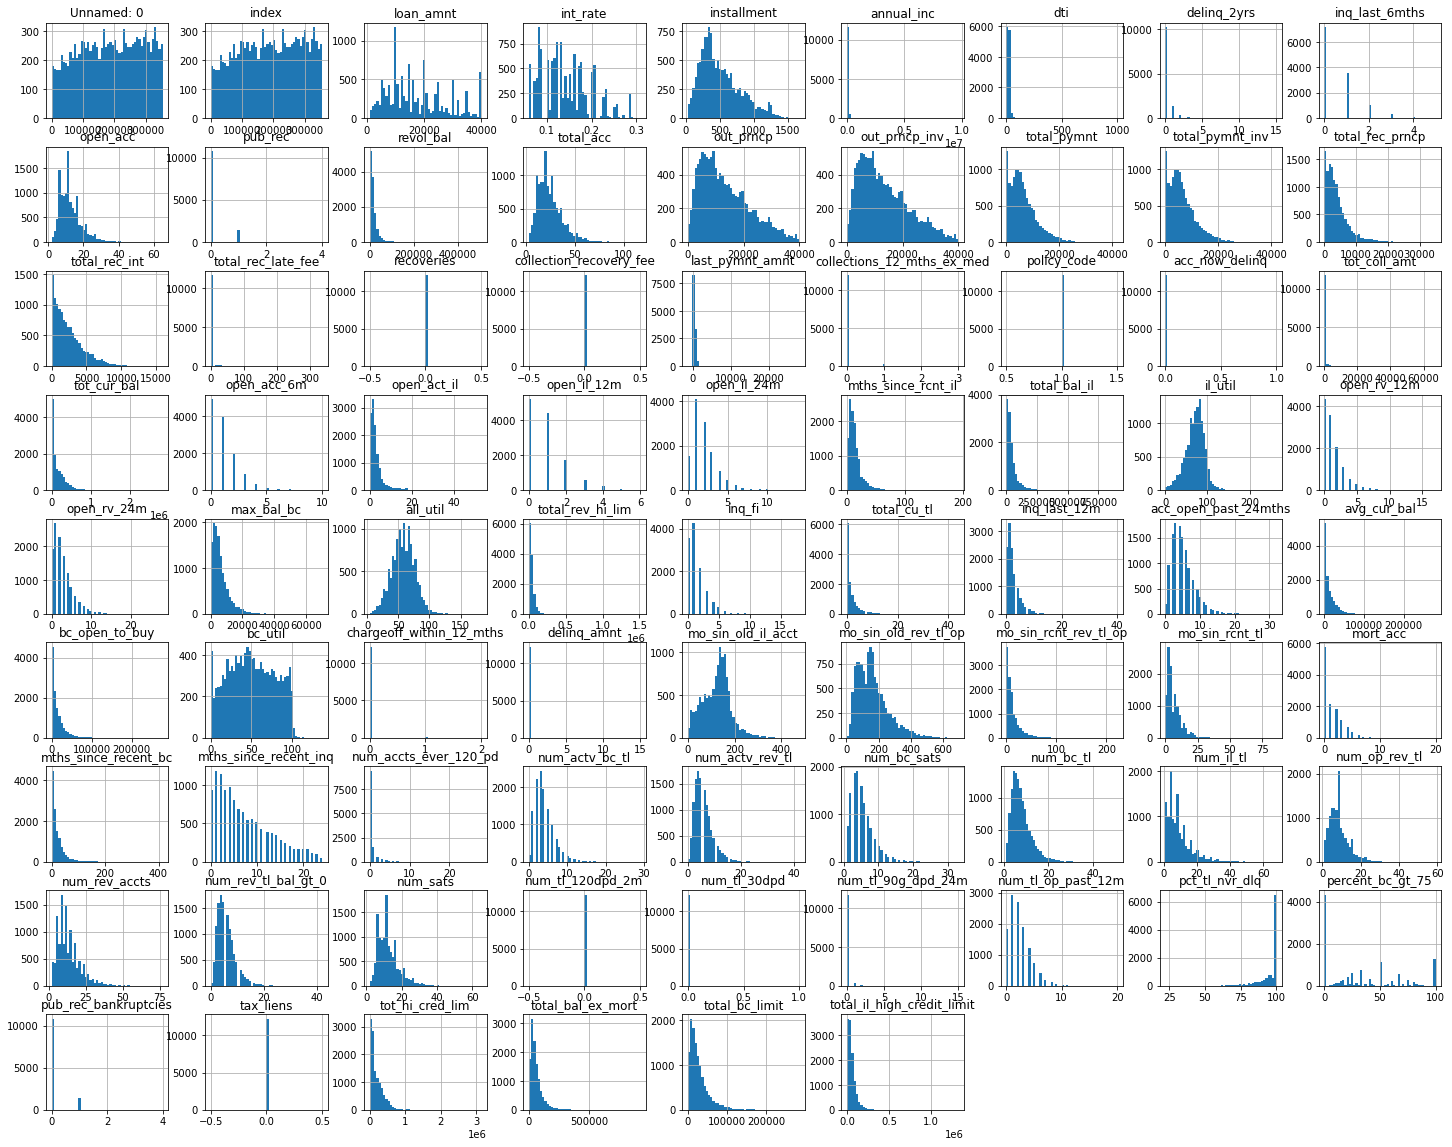

In [6]:
#check the scales of data in each feature
from matplotlib import pyplot as plt
train_df.hist(bins=50, figsize=(25,20))
plt.show()

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4702 entries, 0 to 4701
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  4702 non-null   int64  
 1   index                       4702 non-null   int64  
 2   loan_amnt                   4702 non-null   float64
 3   int_rate                    4702 non-null   float64
 4   installment                 4702 non-null   float64
 5   home_ownership              4702 non-null   object 
 6   annual_inc                  4702 non-null   float64
 7   verification_status         4702 non-null   object 
 8   loan_status                 4702 non-null   object 
 9   pymnt_plan                  4702 non-null   object 
 10  dti                         4702 non-null   float64
 11  delinq_2yrs                 4702 non-null   float64
 12  inq_last_6mths              4702 non-null   float64
 13  open_acc                    4702 

In [8]:
# Convert categorical data to numeric and separate target feature for training data
X = train_df.drop('loan_status', axis=1)
X.shape

(12180, 85)

In [9]:
y = train_df['loan_status']
y.unique()
y.shape

(12180,)

In [10]:
y_train = LabelEncoder().fit_transform(y)
y_train

array([1, 1, 1, ..., 0, 0, 0])

In [11]:
X_train1 = pd.get_dummies(X)
X_train1.shape

(12180, 94)

In [12]:
X_train1.columns

Index(['Unnamed: 0', 'index', 'loan_amnt', 'int_rate', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc'

In [13]:
# dropping the missing columns after the labelencoding from the X train data
X_train = X_train1.drop('debt_settlement_flag_Y', axis=1)
X_train.shape

(12180, 93)

In [14]:
# Convert categorical data to numeric and separate target feature for testing data
x_test_data = test_df.drop('loan_status', axis=1)
X_test = pd.get_dummies(x_test_data)
X_test.shape

(4702, 93)

In [15]:
# X_train = X_test1.drop('debt_settlement_flag_Y', axis=1, inplace=True)

In [16]:
X_test.columns

Index(['Unnamed: 0', 'index', 'loan_amnt', 'int_rate', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc'

In [17]:
y_test = LabelEncoder().fit_transform(test_df['loan_status'])
y_test

array([1, 1, 1, ..., 0, 0, 0])

In [18]:
# Train the Logistic Regression model on the unscaled data and print the model score
model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.648440065681445
0.5253083794130158


C:\Users\sreek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
# Train a Random Forest Classifier model and print the model score
model = RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
0.6097405359421523


In [20]:
# Scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Train the Logistic Regression model on the scaled data and print the model score
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
print(model.score(X_train_scaled, y_train))
print(model.score(X_test_scaled, y_test))

0.7128899835796387
0.7218205019140791


C:\Users\sreek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
# Train a Random Forest Classifier model on the scaled data and print the model score
model = RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(X_train_scaled, y_train)
print(model.score(X_train_scaled, y_train))
print(model.score(X_test_scaled, y_test))

1.0
0.6095278604849


In [23]:
#checking the importance of features in the model
model.feature_importances_

array([4.35062022e-02, 3.77888716e-02, 1.60751243e-02, 3.15190116e-02,
       3.33487063e-02, 1.34762682e-02, 1.44201419e-02, 2.60705412e-03,
       3.42580835e-03, 7.72786348e-03, 1.10311805e-03, 1.40026924e-02,
       1.04097839e-02, 3.05735900e-02, 2.94314472e-02, 4.12460271e-02,
       4.31829003e-02, 5.41884323e-02, 3.49767338e-02, 1.46474207e-02,
       0.00000000e+00, 0.00000000e+00, 8.66893179e-02, 6.77263250e-04,
       0.00000000e+00, 6.42363962e-06, 3.79495376e-03, 1.23082133e-02,
       4.14166007e-03, 5.74104588e-03, 3.56245887e-03, 5.26923404e-03,
       1.07129248e-02, 1.18425384e-02, 1.26587313e-02, 4.51042174e-03,
       7.20115032e-03, 1.46106073e-02, 1.17506137e-02, 1.34636396e-02,
       5.82328799e-03, 5.88026132e-03, 7.29712873e-03, 8.27796896e-03,
       1.28962952e-02, 1.37349038e-02, 1.29440210e-02, 1.92869226e-04,
       0.00000000e+00, 1.38359452e-02, 1.51935245e-02, 1.09827063e-02,
       8.95828962e-03, 4.88338869e-03, 1.22105885e-02, 1.06811767e-02,
      

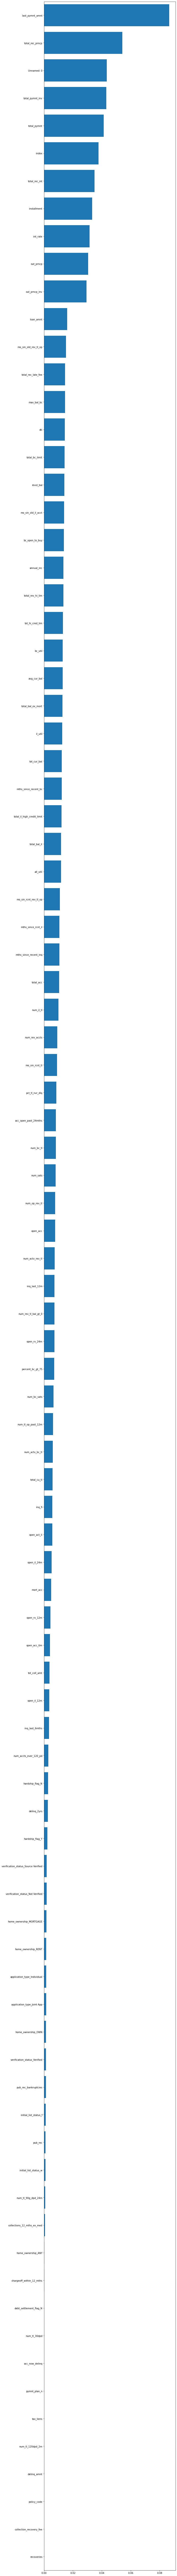

In [24]:
# plotting the importance of features on the target value (check Activity 05 in Day 3 - supervised learning)
features = sorted(zip(X_train.columns, model.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [25]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(model)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=1))

In [26]:
X_selected_train = sel.transform(X_train)
X_selected_test = sel.transform(X_test)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [27]:
model = RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(X_selected_train_scaled, y_train)
print(model.score(X_selected_train_scaled, y_train))
print(model.score(X_selected_test_scaled, y_test))

1.0
0.5914504466184602


In [28]:
model = LogisticRegression()
model.fit(X_selected_train_scaled, y_train)
print(model.score(X_selected_train_scaled, y_train))
print(model.score(X_selected_test_scaled, y_test))

0.7057471264367816
0.7192683964270523


C:\Users\sreek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
